<a href="https://colab.research.google.com/github/thudimillasaiprasad/Building-CNN-in-the-Tensorflow-2.0/blob/main/Building_a_CNN_in_the_Tensor_Flow_2_0_with_the_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let install the dependensies and GPU settup

Lets import dependensies for the project requirement

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.4.1'

let load data for Preprossessing



### Loading the Cifar10 dataset

> Indented block



In [4]:
#Setting class names for the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
#Loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


### Image normalization

In [6]:
X_train = X_train / 255.0

In [7]:
X_train.shape

(50000, 32, 32, 3)

Image Normalisation

In [8]:
X_test=X_test/255.0

In [9]:
X_test[1]

array([[[0.92156863, 0.92156863, 0.92156863],
        [0.90588235, 0.90588235, 0.90588235],
        [0.90980392, 0.90980392, 0.90980392],
        ...,
        [0.91372549, 0.91372549, 0.91372549],
        [0.91372549, 0.91372549, 0.91372549],
        [0.90980392, 0.90980392, 0.90980392]],

       [[0.93333333, 0.93333333, 0.93333333],
        [0.92156863, 0.92156863, 0.92156863],
        [0.92156863, 0.92156863, 0.92156863],
        ...,
        [0.9254902 , 0.9254902 , 0.9254902 ],
        [0.9254902 , 0.9254902 , 0.9254902 ],
        [0.92156863, 0.92156863, 0.92156863]],

       [[0.92941176, 0.92941176, 0.92941176],
        [0.91764706, 0.91764706, 0.91764706],
        [0.91764706, 0.91764706, 0.91764706],
        ...,
        [0.92156863, 0.92156863, 0.92156863],
        [0.92156863, 0.92156863, 0.92156863],
        [0.91764706, 0.91764706, 0.91764706]],

       ...,

       [[0.34117647, 0.38823529, 0.34901961],
        [0.16862745, 0.2       , 0.14509804],
        [0.0745098 , 0

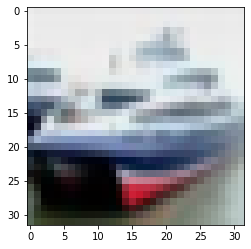

In [10]:
plt.imshow(X_test[1])

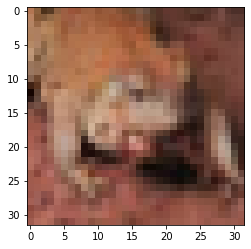

In [11]:
plt.imshow(X_test[5])

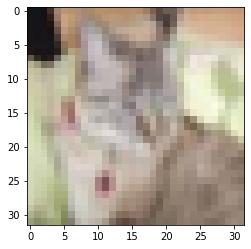

In [12]:
plt.imshow(X_test[8])

Building a CNN

Define modelling 

In [13]:
model = tf.keras.models.Sequential()

Adding First CNN Layer



### Adding the first CNN Layer

CNN layer hyper-parameters:
- filters: 32
- kernel_size:3
- padding: same
- activation: relu
- input_shape: (32, 32, 3)


In [15]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same",activation="relu",input_shape=[32,32,3]))

### Adding the second CNN Layer and max pool layer

CNN layer hyper-parameters:
- filters: 32
- kernel_size:3
- padding: same
- activation: relu

MaxPool layer hyper-parameters:
- pool_size: 2
- strides: 2
- padding: valid

In [16]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same",activation="relu"))

In [17]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding="valid"))

Lets add 3 rd CNN layer 
with the filters=64,kernel_size=3,padding=same,activation=relu



In [18]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))

Lets add 4th CNN layer and maxpool layer

In [19]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))

In [20]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding="valid"))

Adding the flateren layer

In [21]:
model.add(tf.keras.layers.Flatten())

### Adding the first Dense layer

Dense layer hyper-parameters:
- units/neurons: 128
- activation: relu

In [22]:
model.add(tf.keras.layers.Dense(units=128,activation="relu"))

Adding 2 dense layer 

### Adding the second Dense layer (output layer)

Dense layer hyper-parameters:

 - units/neurons: 10 (number of classes)
 - activation: softmax


In [23]:
model.add(tf.keras.layers.Dense(units=10,activation="softmax"))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

### Compiling the model

#### sparse_categorical_accuracy
sparse_categorical_accuracy checks to see if the maximal true value is equal to the index of the maximal predicted value.

https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy 

In [30]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam", metrics=["sparse_categorical_accuracy"])

Training the Model

In [31]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1065 - sparse_categorical_accuracy: 0.9642
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0857 - sparse_categorical_accuracy: 0.9711
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0796 - sparse_categorical_accuracy: 0.9732
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0793 - sparse_categorical_accuracy: 0.9729
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0808 - sparse_categorical_accuracy: 0.9735
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0741 - sparse_categorical_accuracy: 0.9751
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0696 - sparse_categorical_accuracy: 0.9765
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0692 - sparse_categorical_accuracy: 0.9771
Epoch 9/10
1563/1563 [==========

Model Evaluation and Prediction

In [32]:
test_loss,test_accuracy  = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.0458 - sparse_categorical_accuracy: 0.7309


In [33]:
print("Test accuracy:{}".format(test_accuracy))

Test accuracy:0.73089998960495
